In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

import seaborn as sns




In [2]:
def Format_Test_Data(var_data_file, var_rows_to_load):
    # Load and preprocess the data
    data = pd.read_csv(var_data_file, nrows=var_rows_to_load)
    
    print("original DataFrame:")
    display(data)
    
    # restructure columns here so that label is the last column:
    var_final_dataset_column_list = data.columns.tolist()
    
    # remove the "label" column here and append it at the end of the list:
    var_final_dataset_column_list.remove("label")
    var_final_dataset_column_list.remove("time")
    var_final_dataset_column_list.remove("tonic_entropy")

    var_final_dataset_column_list.remove("acc_x")
    var_final_dataset_column_list.remove("acc_y")
    var_final_dataset_column_list.remove("acc_z")
    var_final_dataset_column_list.remove("seconds")

    
    var_final_dataset_column_list.append("label")
    data = data[var_final_dataset_column_list]
    
    var_final_dataset_column_list_final = var_final_dataset_column_list.copy()
      
    for var_column in var_final_dataset_column_list:
        nan_count = data[var_column].isna().sum()
        if nan_count > 0:
            # drop this column here:
            print("column has NaN:")
            print(var_column,nan_count)
            var_final_dataset_column_list_final.remove(var_column)
            
        inf_count = data[var_column].map(np.isinf).sum()
        #print(inf_count)
        if inf_count > 0:
            # drop this column here:
            print()
            print("column has Inf:")
            print(var_column,inf_count)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
        
        #print(var_column[0:5])
        # remove survey columns here:
        if var_column[0:5] == "PANAS" or var_column[0:4] == "STAI" or var_column[0:4] == "SAM0":
            # drop this column here:
            print()
            print("column has Survey Data:")
            print(var_column)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
            
            
        
    #data.dropna(inplace=True)
    # Remove the first column
    #first_column_name = data.columns[0]
    #data = data.drop(columns=first_column_name)
    
    # remove all columns which have NaN here:
    data = data[var_final_dataset_column_list_final]
    
    data = data[(data['label'] < 5) & (data['label'] > 0)]
    
    data = data.iloc[:,1:]
    
    print("DataFrame (after NaN and Inf removed):")
    display(data)
    print("columns names after removal = ")
    print(data.columns)    
    
    #data.dropna(inplace=True)

    data.to_csv('Capstone_TEST_dataset_for_ml_50ms.csv', index=False)
    
    unique_labels = data['label'].unique()

    # Print the unique values
    print("Unique values in TEST 'label' column:", unique_labels)
    
    var_feature_columns = data.columns[:-1]
    # Difference the DataFrame at the 1-second level (20 rows)
    data.iloc[:,:-1] = data.iloc[:,:-1].diff(periods=20)
    data = data.dropna()
    
    X_test = data[var_feature_columns].values
    y_test = data['label'].values



    # Scale the X "Train" features between 0 and 1
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #X_test = scaler.fit_transform(X_test)

    # Scale the X "Test" features between 0 and 1
    #X_test = scaler.transform(X_test)
    
    return [X_test,y_test, data.columns]

In [3]:
def Load_StandardTrainTestSplit_Xy(var_data_file, var_rows_to_load, var_test_size=0.2):
    # Load and preprocess the data
    data = pd.read_csv(var_data_file, nrows=var_rows_to_load)
    
    print("original DataFrame:")
    display(data)
    
    # restructure columns here so that label is the last column:
    var_final_dataset_column_list = data.columns.tolist()
    
    # remove the "label" column here and append it at the end of the list:
    var_final_dataset_column_list.remove("label")
    var_final_dataset_column_list.remove("time")
    var_final_dataset_column_list.remove("tonic_entropy")
    
    var_final_dataset_column_list.remove("acc_x")
    var_final_dataset_column_list.remove("acc_y")
    var_final_dataset_column_list.remove("acc_z")
    var_final_dataset_column_list.remove("seconds")

    
    var_final_dataset_column_list.append("label")
    data = data[var_final_dataset_column_list]
    
    var_final_dataset_column_list_final = var_final_dataset_column_list.copy()
      
    for var_column in var_final_dataset_column_list:
        nan_count = data[var_column].isna().sum()
        if nan_count > 0:
            # drop this column here:
            print("column has NaN:")
            print(var_column,nan_count)
            var_final_dataset_column_list_final.remove(var_column)
            
        inf_count = data[var_column].map(np.isinf).sum()
        #print(inf_count)
        if inf_count > 0:
            # drop this column here:
            print()
            print("column has Inf:")
            print(var_column,inf_count)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
        
        #print(var_column[0:5])
        # remove survey columns here:
        if var_column[0:5] == "PANAS" or var_column[0:4] == "STAI" or var_column[0:4] == "SAM0":
            # drop this column here:
            print()
            print("column has Survey Data:")
            print(var_column)
            if var_column in var_final_dataset_column_list_final:
                var_final_dataset_column_list_final.remove(var_column)
            
            
        
    #data.dropna(inplace=True)
    # Remove the first column
    #first_column_name = data.columns[0]
    #data = data.drop(columns=first_column_name)
    
    # remove all columns which have NaN here:
    data = data[var_final_dataset_column_list_final]
    
    data = data.iloc[:,2:]
    
    print("DataFrame (after NaN and Inf removed):")
    display(data)
    
    print("columns names after removal = ")
    print(data.columns)
    
    
    #data.dropna(inplace=True)

    data.to_csv('Capstone_final_final_dataset_for_ml_50ms.csv', index=False)
       
    var_feature_columns = data.columns[:-1]
    ## Difference the DataFrame at the 1-second level (20 rows)
    data.iloc[:,:-1] = data.iloc[:,:-1].diff(periods=20)
    data = data.dropna()
    
    X = data[var_feature_columns].values
    y = data['label'].values
    
    unique_labels = data['label'].unique()

    # Print the unique values
    print("Unique values in TRAIN 'label' column:", unique_labels)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=var_test_size, random_state=42)
    
    var_print_bool = True
    
    if var_print_bool:
        print("X and y train / test before scale function:")
        var_X_train_df = pd.DataFrame(X_train)
        var_X_test_df = pd.DataFrame(X_test)
        var_y_train_df = pd.DataFrame(y_train)
        var_y_test_df = pd.DataFrame(y_test)
    
        print("var_X_train_df = ")
        display(var_X_train_df)

        print("var_X_test_df = ")
        display(var_X_test_df)

        print("var_y_train_df = ")
        display(var_y_train_df)

        print("var_y_test_df = ")
        display(var_y_test_df)

    # Scale the X "Train" features between 0 and 1
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #X_train = scaler.fit_transform(X_train)

    # Scale the X "Test" features between 0 and 1
    #X_test = scaler.transform(X_test)
    
    return [(X_train,X_test,y_train,y_test), data, data.columns]

In [4]:
var_data_file_name = 'Capstone_final_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 100000

#load all:
var_n_rows_to_load = None

var_test_size = .25
var_verbose = True

#X_train,X_test,y_train,y_test = LoadDataXy(var_data_file_name, var_n_rows_to_load, var_verbose)
var_return = Load_StandardTrainTestSplit_Xy(var_data_file_name, var_n_rows_to_load, var_test_size)
X_train,X_test,y_train,y_test = var_return[0]
var_data_df = var_return[1]
var_train_data_df_column_list = var_return[2]
#X_train,X_test,y_train,y_test = Load_StandardTrainTestSplit_Xy(var_data_file_name, var_n_rows_to_load, var_test_size)

original DataFrame:


,Unnamed: 0,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,718272,14,4,1970-01-01 09:58:30.800,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718273,718273,14,4,1970-01-01 09:58:30.850,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718274,718274,14,4,1970-01-01 09:58:30.900,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718275,718275,14,4,1970-01-01 09:58:30.950,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert
column has NaN:
PANAS16_Nervous 15882

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy
column 

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,34.231500,0.204075,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718273,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,34.225349,0.383824,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718274,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,34.226444,0.576782,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718275,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,34.225175,0.762852,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.003206,-0.008389,-0.004703,0.046876,0.001466,0.002027,0.001811,0.684596,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001914,0.001994,0.003749,-0.005991,0.000888,-0.009471,-0.004689,1.913016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.014526,0.033811,-0.046811,0.133250,-0.001011,0.000076,-0.003800,-0.675834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016217,-0.001017,0.004571,0.062477,-0.000810,0.001090,0.004650,-0.920454,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004709,-0.002771,0.003114,0.020896,-0.000811,0.002441,-0.001759,-2.595694,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538687,-0.005806,-0.002846,-0.001709,0.066437,-0.000163,0.008861,0.015064,1.147810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538688,0.003766,-0.005417,-0.002097,0.085705,-0.002798,0.000817,0.003435,-2.263620,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538689,0.005377,-0.000349,0.011554,0.008623,-0.003564,-0.008087,0.004796,-1.499852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538690,0.001583,0.001051,0.004760,0.044886,0.000131,0.000131,-0.002868,-1.698565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


var_X_test_df = 


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.004726,-0.000737,-0.007451,-0.083003,-0.000850,0.002398,0.000517,-2.628871,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.011549,-0.020589,-0.030177,-0.081197,0.001063,0.002539,0.001889,3.043780,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.009886,0.003766,-0.005417,-0.027695,-0.012367,0.044719,0.009162,4.294870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003400,-0.002794,0.025057,-0.011885,0.000817,0.095585,-0.005452,9.400940,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000446,0.006686,-0.008509,0.014758,-0.000197,-0.005319,0.000902,-2.312099,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179560,0.001800,0.000274,0.000371,0.003527,0.000981,-0.002289,-0.003790,0.358451,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179561,0.002794,0.004137,0.007577,0.024811,-0.000428,-0.005166,0.004584,-1.849016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179562,-0.022669,-0.126971,0.085943,-0.063026,-0.001771,-0.003869,-0.012025,4.523839,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179563,0.040817,0.095000,0.472103,0.104330,0.001202,0.022354,0.000858,-2.129255,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


var_y_train_df = 


,0
0,4
1,1
2,1
3,4
4,3
...,...
538687,1
538688,1
538689,1
538690,1


var_y_test_df = 


,0
0,4
1,3
2,3
3,2
4,1
...,...
179560,1
179561,3
179562,1
179563,4


## Run Random Forest on 75% of TRAIN dataset and test of 25% of TRAIN dataset here:

In [5]:
X_train_df = pd.DataFrame(X_train,columns=var_train_data_df_column_list[:-1])
display(X_train_df)
print(X_train_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,0.003206,-0.008389,-0.004703,0.046876,0.001466,0.002027,0.001811,0.684596,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001914,0.001994,0.003749,-0.005991,0.000888,-0.009471,-0.004689,1.913016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.014526,0.033811,-0.046811,0.133250,-0.001011,0.000076,-0.003800,-0.675834,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016217,-0.001017,0.004571,0.062477,-0.000810,0.001090,0.004650,-0.920454,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004709,-0.002771,0.003114,0.020896,-0.000811,0.002441,-0.001759,-2.595694,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538687,-0.005806,-0.002846,-0.001709,0.066437,-0.000163,0.008861,0.015064,1.147810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538688,0.003766,-0.005417,-0.002097,0.085705,-0.002798,0.000817,0.003435,-2.263620,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538689,0.005377,-0.000349,0.011554,0.008623,-0.003564,-0.008087,0.004796,-1.499852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538690,0.001583,0.001051,0.004760,0.044886,0.000131,0.000131,-0.002868,-1.698565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(538692, 86)


In [6]:
X_test_df = pd.DataFrame(X_test,columns=var_train_data_df_column_list[:-1])
display(X_test_df)
print(X_test_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,-0.004726,-0.000737,-0.007451,-0.083003,-0.000850,0.002398,0.000517,-2.628871,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.011549,-0.020589,-0.030177,-0.081197,0.001063,0.002539,0.001889,3.043780,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.009886,0.003766,-0.005417,-0.027695,-0.012367,0.044719,0.009162,4.294870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003400,-0.002794,0.025057,-0.011885,0.000817,0.095585,-0.005452,9.400940,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000446,0.006686,-0.008509,0.014758,-0.000197,-0.005319,0.000902,-2.312099,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179560,0.001800,0.000274,0.000371,0.003527,0.000981,-0.002289,-0.003790,0.358451,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179561,0.002794,0.004137,0.007577,0.024811,-0.000428,-0.005166,0.004584,-1.849016,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179562,-0.022669,-0.126971,0.085943,-0.063026,-0.001771,-0.003869,-0.012025,4.523839,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179563,0.040817,0.095000,0.472103,0.104330,0.001202,0.022354,0.000858,-2.129255,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(179565, 86)


In [7]:
display(y_train)
print(y_train.shape)

array([4, 1, 1, ..., 1, 1, 1])

(538692,)


In [8]:
display(y_test)
print(y_test.shape)

array([4, 3, 3, ..., 1, 4, 1])

(179565,)


## Run Random Forest on 75% of TRAIN dataset and test of 25% of TRAIN dataset here:

In [9]:
var_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=39, n_jobs=36).fit(X_train, y_train)


All Train / Test Data Subjects = 
Training set score: 0.930
Test set score: 0.571


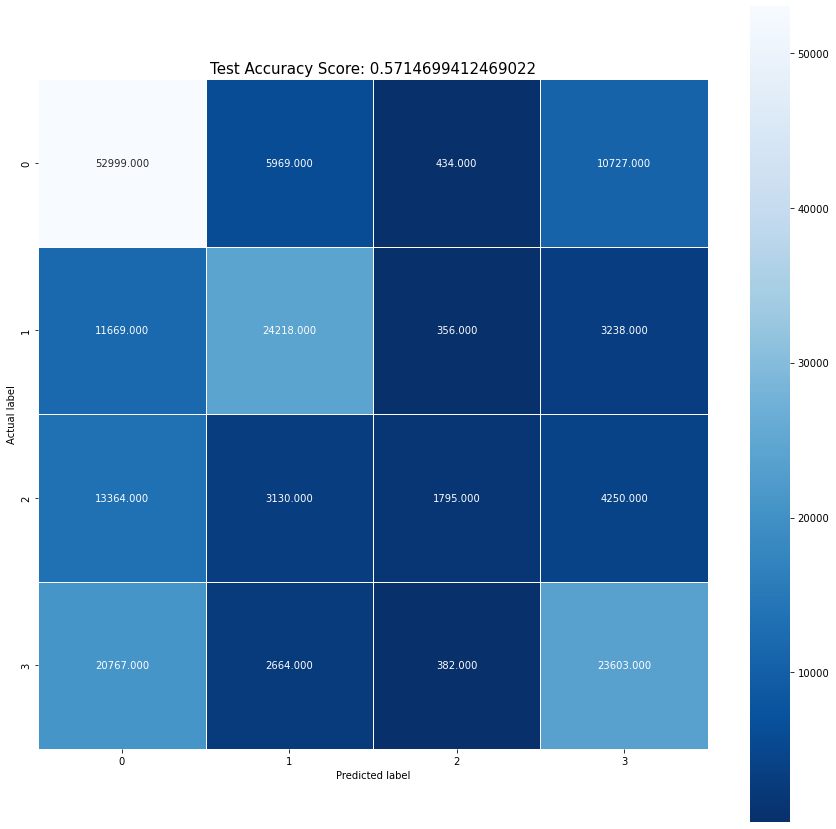

In [10]:
##################################################################################
##################################################################################
##################################################################################
# print scores here:
print("All Train / Test Data Subjects = ")
var_train_score = var_model.score(X_train, y_train)
var_test_score = var_model.score(X_test, y_test)
print("Training set score: {:.3f}".format(var_train_score))
print("Test set score: {:.3f}".format(var_test_score))

#print("matrix = ")
predictions = var_model.predict(X_test)
var_cm = metrics.confusion_matrix(y_test, predictions)
#print(var_cm)
#print()
#print()

#print("Subject:  ", var_current_subject)
# plotting code from:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(15,15))
sns.heatmap(var_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(var_test_score)
plt.title(all_sample_title, size = 15)
plt.show()


## Perform Grid Search here to find the best max_depth value

In [11]:
'''
# Define the parameter grid for max_depth values
param_grid = {'max_depth': list(range(1, 101))}

# Initialize the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=36)

# Initialize the GridSearchCV with the RandomForest model and the max_depth parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=36)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

# Get the mean cross-validated accuracy scores for each max_depth value
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the accuracy scores over different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 101)), mean_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores vs Max Depth')
plt.grid()
plt.show()
'''

'\n# Define the parameter grid for max_depth values\nparam_grid = {\'max_depth\': list(range(1, 101))}\n\n# Initialize the RandomForest model\nrf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=36)\n\n# Initialize the GridSearchCV with the RandomForest model and the max_depth parameter grid\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=\'accuracy\', verbose=2, n_jobs=36)\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Get the best max_depth value\nbest_max_depth = grid_search.best_params_[\'max_depth\']\nprint("Best max_depth:", best_max_depth)\n\n# Get the mean cross-validated accuracy scores for each max_depth value\nmean_scores = grid_search.cv_results_[\'mean_test_score\']\n\n# Plot the accuracy scores over different max_depth values\nplt.figure(figsize=(10, 6))\nplt.plot(list(range(1, 101)), mean_scores, marker=\'o\')\nplt.xlabel(\'Max Depth\')\nplt.ylabel(\'Accuracy\')\nplt.title(\'Accuracy 

## Perform Grid Search here to find the best number of trees (n_estimators) value, assuming max depth = 39

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best n_estimators: 300


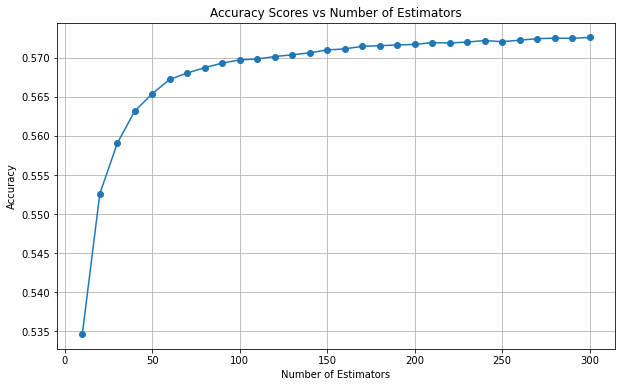

In [12]:
# Define the parameter grid for n_estimators values
param_grid = {'n_estimators': list(range(10, 301, 10))}

# Initialize the RandomForest model with max_depth=39
rf = RandomForestClassifier(max_depth=39, random_state=42, n_jobs=36)

# Initialize the GridSearchCV with the RandomForest model and the n_estimators parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=36)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

# Get the mean cross-validated accuracy scores for each n_estimators value
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot the accuracy scores over different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(list(range(10, 301, 10)), mean_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores vs Number of Estimators')
plt.grid()
plt.show()


## Train on 100% of TRAIN dataset here:

In [13]:
var_data_file_name = 'Capstone_final_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 100000

#load all:
var_n_rows_to_load = None

var_test_size = 0.00001
var_verbose = True


var_return = Load_StandardTrainTestSplit_Xy(var_data_file_name, var_n_rows_to_load, var_test_size)
X_train,X_test,y_train,y_test = var_return[0]
var_data_df = var_return[1]
var_train_data_df_column_list = var_return[2]


original DataFrame:


,Unnamed: 0,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,0,2,1,1970-01-01 00:00:00.000,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
1,1,2,1,1970-01-01 00:00:00.050,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
2,2,2,1,1970-01-01 00:00:00.100,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
3,3,2,1,1970-01-01 00:00:00.150,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
4,4,2,1,1970-01-01 00:00:00.200,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,...,12.093175,-inf,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,12.524029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,718272,14,4,1970-01-01 09:58:30.800,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718273,718273,14,4,1970-01-01 09:58:30.850,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718274,718274,14,4,1970-01-01 09:58:30.900,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276
718275,718275,14,4,1970-01-01 09:58:30.950,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,...,5.484862,-inf,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,11.285276



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert
column has NaN:
PANAS16_Nervous 15882

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy
column 

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.889131,-0.104177,-0.254086,0.052203,0.000302,5.712509,29.119919,1.025521,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
1,0.889731,-0.100206,-0.242897,0.076138,-0.005188,5.707354,29.119755,0.710013,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
2,0.893480,-0.103223,-0.248234,0.073135,-0.003722,5.698667,29.125584,0.327802,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
3,0.878366,-0.113154,-0.236754,0.054067,0.000221,5.692651,29.133441,-0.066877,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
4,0.890411,-0.117394,-0.238989,0.058294,-0.003258,5.685992,29.122919,-0.490505,27.0,175.0,...,27.0,12.093175,7.010534,12.596496,0.0,85.473764,1.492718e+08,41.0,14.415939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718272,0.759880,0.057206,-0.539423,0.040534,-0.004145,2.928292,34.231500,0.204075,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718273,0.756909,0.059520,-0.539331,-0.188461,-0.003279,2.927660,34.225349,0.383824,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718274,0.750143,0.062286,-0.554251,-0.173746,-0.002144,2.926516,34.226444,0.576782,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4
718275,0.752429,0.060760,-0.540189,-0.133898,-0.003318,2.927410,34.225175,0.762852,27.0,180.0,...,7.0,5.484862,2.843061,5.237621,0.0,26.892228,8.132271e+06,9.0,5.959502,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.024177,0.003349,-0.012183,0.138433,-0.001061,-0.013297,-0.001918,1.911926,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004623,0.002034,0.008194,-0.063034,-0.000570,-0.008272,0.009773,-0.852356,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003806,0.004434,0.000531,-0.181110,0.000388,-0.004316,-0.000739,-8.907514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.012949,-0.000229,-0.001463,-0.149613,-0.002828,0.008316,0.002193,-0.050528,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001314,0.007389,-0.004611,0.008678,0.001218,0.002071,0.001855,-4.361790,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718244,-0.005806,-0.002846,-0.001709,0.066437,-0.000163,0.008861,0.015064,1.147810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718245,0.003766,-0.005417,-0.002097,0.085705,-0.002798,0.000817,0.003435,-2.263620,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718246,0.005377,-0.000349,0.011554,0.008623,-0.003564,-0.008087,0.004796,-1.499852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718247,0.001583,0.001051,0.004760,0.044886,0.000131,0.000131,-0.002868,-1.698565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


var_X_test_df = 


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,-0.004726,-0.000737,-0.007451,-0.083003,-0.000850,0.002398,0.000517,-2.628871,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.011549,-0.020589,-0.030177,-0.081197,0.001063,0.002539,0.001889,3.043780,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.009886,0.003766,-0.005417,-0.027695,-0.012367,0.044719,0.009162,4.294870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003400,-0.002794,0.025057,-0.011885,0.000817,0.095585,-0.005452,9.400940,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000446,0.006686,-0.008509,0.014758,-0.000197,-0.005319,0.000902,-2.312099,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.002263,0.007840,0.000046,0.027064,-0.002242,-0.009995,0.002148,-4.365932,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.005891,0.011371,-0.085989,0.044500,0.001392,-0.011509,-0.007666,-7.887878,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.005017,0.004783,0.007566,0.462173,-0.001470,-0.002845,-0.006871,-2.143162,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


var_y_train_df = 


,0
0,4
1,1
2,1
3,4
4,1
...,...
718244,1
718245,1
718246,1
718247,1


var_y_test_df = 


,0
0,4
1,3
2,3
3,2
4,1
5,1
6,4
7,4


In [14]:
var_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=39, n_jobs=36).fit(X_train, y_train)

In [15]:
X_train_df = pd.DataFrame(X_train,columns=var_train_data_df_column_list[:-1])
display(X_train_df)
print(X_train_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,-0.024177,0.003349,-0.012183,0.138433,-0.001061,-0.013297,-0.001918,1.911926,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004623,0.002034,0.008194,-0.063034,-0.000570,-0.008272,0.009773,-0.852356,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003806,0.004434,0.000531,-0.181110,0.000388,-0.004316,-0.000739,-8.907514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.012949,-0.000229,-0.001463,-0.149613,-0.002828,0.008316,0.002193,-0.050528,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001314,0.007389,-0.004611,0.008678,0.001218,0.002071,0.001855,-4.361790,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718244,-0.005806,-0.002846,-0.001709,0.066437,-0.000163,0.008861,0.015064,1.147810,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718245,0.003766,-0.005417,-0.002097,0.085705,-0.002798,0.000817,0.003435,-2.263620,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718246,0.005377,-0.000349,0.011554,0.008623,-0.003564,-0.008087,0.004796,-1.499852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718247,0.001583,0.001051,0.004760,0.044886,0.000131,0.000131,-0.002868,-1.698565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(718249, 86)


## Load final TEST set here:

In [16]:
var_data_file_name = 'Capstone_final_TEST_dataset_for_ml_50ms.csv'
#var_n_rows_to_load = 1000000
#var_n_rows_to_load = 1000

#load all:
var_n_rows_to_load = None

var_verbose = True

#X_train,X_test,y_train,y_test = LoadDataXy(var_data_file_name, var_n_rows_to_load, var_verbose)
var_return = Format_Test_Data(var_data_file_name, var_n_rows_to_load)

original DataFrame:


,subject,label,time,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,...,tonic_rms,tonic_entropy,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,phasic_entropy
0,15,1,1970-01-01 00:00:00.000,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
1,15,1,1970-01-01 00:00:00.050,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
2,15,1,1970-01-01 00:00:00.100,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
3,15,1,1970-01-01 00:00:00.150,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
4,15,1,1970-01-01 00:00:00.200,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,...,4.874447,-inf,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,11.47029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180944,17,4,1970-01-01 02:30:46.750,0.489731,-0.003503,-0.830869,-0.200391,-0.004282,7.028656,34.077069,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180945,17,4,1970-01-01 02:30:46.800,0.486531,-0.004200,-0.832280,-0.117299,-0.003047,7.025888,34.078118,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180946,17,4,1970-01-01 02:30:46.850,0.484634,-0.002354,-0.830251,-0.023418,-0.002673,7.024678,34.074848,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000
180947,17,4,1970-01-01 02:30:46.900,0.486080,-0.007046,-0.823200,0.182867,-0.004349,7.023141,34.072500,...,0.000000,0.0,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,0.00000



column has Survey Data:
PANAS01_Active

column has Survey Data:
PANAS02_Distressed

column has Survey Data:
PANAS03_Interested

column has Survey Data:
PANAS04_Inspired

column has Survey Data:
PANAS05_Annoyed

column has Survey Data:
PANAS06_Strong

column has Survey Data:
PANAS07_Guilty

column has Survey Data:
PANAS08_Scared

column has Survey Data:
PANAS09_Hostile

column has Survey Data:
PANAS10_Excited

column has Survey Data:
PANAS11_Proud

column has Survey Data:
PANAS12_Irritable

column has Survey Data:
PANAS13_Enthusiastic

column has Survey Data:
PANAS14_Ashamed

column has Survey Data:
PANAS15_Alert

column has Survey Data:
PANAS16_Nervous

column has Survey Data:
PANAS17_Determined

column has Survey Data:
PANAS18_Attentive

column has Survey Data:
PANAS19_Jittery

column has Survey Data:
PANAS20_Afraid

column has Survey Data:
PANAS21_Stressed

column has Survey Data:
PANAS22_Frustrated

column has Survey Data:
PANAS23_Happy

column has Survey Data:
PANAS24_Angry
column

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms,label
0,0.906806,0.072097,-0.103560,-0.153278,-0.003666,1.422719,33.526420,-2.146432,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
1,0.900217,0.066109,-0.106011,0.007455,-0.005630,1.424125,33.524947,-2.245135,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
2,0.903280,0.062154,-0.099771,-0.006536,0.000207,1.421912,33.530004,-2.340611,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
3,0.904366,0.065137,-0.103537,0.001406,-0.000717,1.420550,33.530740,-2.403085,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
4,0.903486,0.072971,-0.093983,0.026644,-0.003453,1.424833,33.534019,-2.420306,28.0,186.0,...,7,4.874447,3.5151,4.294627,0.0,17.361208,5.573183e+06,11,5.549752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180944,0.489731,-0.003503,-0.830869,-0.200391,-0.004282,7.028656,34.077069,13.653608,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180945,0.486531,-0.004200,-0.832280,-0.117299,-0.003047,7.025888,34.078118,13.842294,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180946,0.484634,-0.002354,-0.830251,-0.023418,-0.002673,7.024678,34.074848,14.038217,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4
180947,0.486080,-0.007046,-0.823200,0.182867,-0.004349,7.023141,34.072500,14.165998,29.0,165.0,...,0,0.000000,0.0000,0.000000,0.0,0.000000,0.000000e+00,0,0.000000,4


columns names after removal = 
Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_me

In [17]:
var_X_TEST_held_out = var_return[0]
var_y_TEST_held_out = var_return[1]

var_test_data_df_column_list = var_return[2]

In [18]:
print(var_train_data_df_column_list)
print(len(var_train_data_df_column_list))
print(var_test_data_df_column_list)
print(len(var_test_data_df_column_list))

Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_mean', 'tonic_std', 'tonic_min', 

In [19]:
var_X_TEST_held_out_df = pd.DataFrame(var_X_TEST_held_out,columns=var_train_data_df_column_list[:-1])
display(var_X_TEST_held_out_df)
print(var_X_TEST_held_out_df.shape)

,ACC_1,ACC_2,ACC_3,ECG,EMG,EDA,Temp,Resp,age,height,...,tonic_energy,tonic_peaks,tonic_rms,phasic_mean,phasic_std,phasic_min,phasic_max,phasic_energy,phasic_peaks,phasic_rms
0,-0.014366,-0.045543,-0.039971,0.152399,0.001356,-0.001090,0.002285,1.084333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000743,-0.034457,-0.046211,-0.014588,0.003068,-0.000196,0.005660,1.405291,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.008874,0.004326,-0.055480,0.060259,-0.002720,0.000381,0.000043,1.732875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.009480,0.009023,-0.047297,0.001345,-0.004478,0.002114,-0.006700,2.071533,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.004823,-0.023657,-0.054600,0.083896,0.006711,-0.002899,-0.005222,2.412240,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180924,0.008063,-0.007560,0.000183,-0.225279,0.000607,-0.006539,-0.005570,8.486285,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180925,0.001354,-0.006177,-0.003434,-0.087807,0.001420,-0.009973,0.000397,8.217207,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180926,-0.001463,-0.001509,-0.000366,-0.831325,0.002018,-0.013613,-0.005486,7.943420,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180927,-0.001291,-0.005566,0.003886,0.394176,-0.000521,-0.020261,-0.011012,7.570278,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(180929, 86)


In [20]:
display(var_y_TEST_held_out)
print(var_y_TEST_held_out.shape)

array([1, 1, 1, ..., 4, 4, 4])

(180929,)


In [21]:
# Make predictions on the test data
y_TEST_pred = var_model.predict(var_X_TEST_held_out)

print(np.unique(var_y_TEST_held_out))
print(np.unique(y_TEST_pred))

# Evaluate the model
accuracy = accuracy_score(var_y_TEST_held_out, y_TEST_pred)
print("Accuracy: ", accuracy)

# Classification report
print("Classification Report:\n", classification_report(var_y_TEST_held_out, y_TEST_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(var_y_TEST_held_out, y_TEST_pred))

[1 2 3 4]
[1 2 3 4]
Accuracy:  0.4980517219461778
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.74      0.60     70702
           2       0.59      0.53      0.56     41642
           3       0.23      0.03      0.05     22242
           4       0.42      0.32      0.37     46343

    accuracy                           0.50    180929
   macro avg       0.44      0.41      0.39    180929
weighted avg       0.47      0.50      0.46    180929

Confusion Matrix:
 [[52448  7402  1011  9841]
 [13113 22073   657  5799]
 [13648  3240   615  4739]
 [26198  4820   349 14976]]


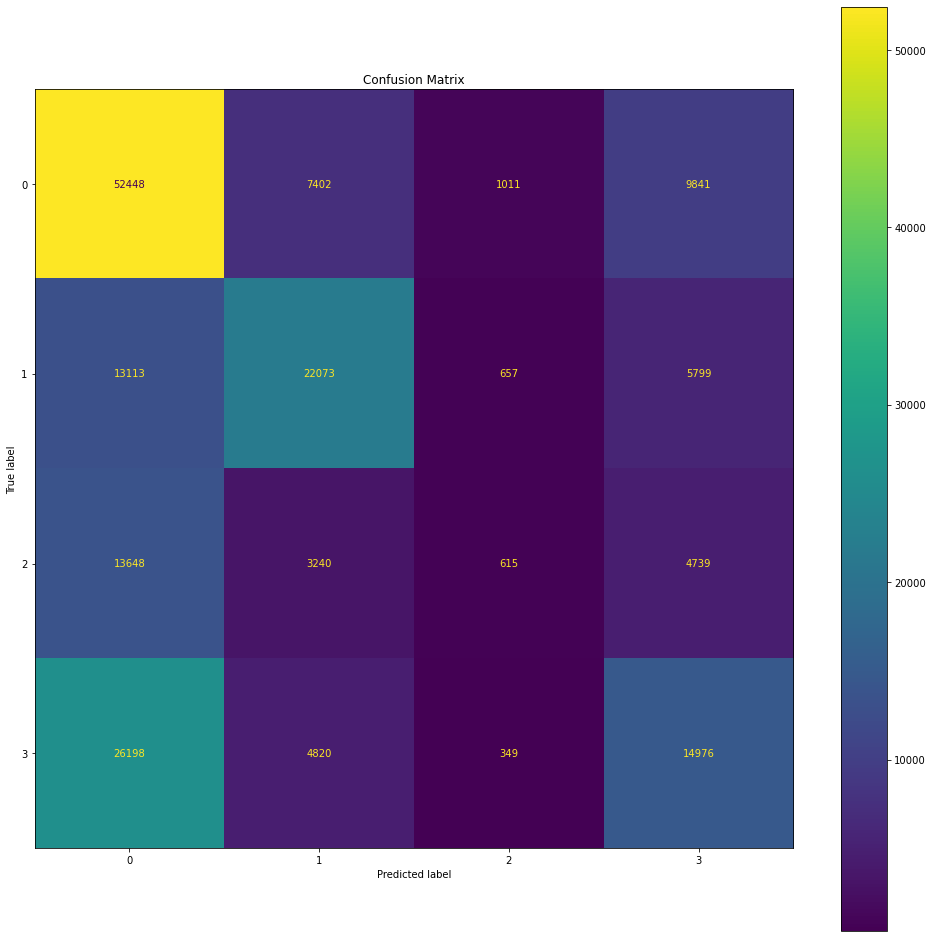

In [22]:
# Calculate the confusion matrix
cm = confusion_matrix(var_y_TEST_held_out, y_TEST_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(17, 17))  # Set the desired figure size (width, height) in inches
cm_display.plot(ax=ax)  # Pass the axes object to the plot method
plt.title('Confusion Matrix')
plt.show()


In [23]:
print(var_train_data_df_column_list)
print(len(var_train_data_df_column_list))
print(var_test_data_df_column_list)
print(len(var_test_data_df_column_list))

Index(['ACC_1', 'ACC_2', 'ACC_3', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'age',
       'height', 'weight', 'gender', 'dominant_hand', 'ACC_1_mean',
       'ACC_1_std', 'ACC_1_min', 'ACC_1_max', 'ACC_2_mean', 'ACC_2_std',
       'ACC_2_min', 'ACC_2_max', 'ACC_3_mean', 'ACC_3_std', 'ACC_3_min',
       'ACC_3_max', 'ECG_mean', 'ECG_std', 'ECG_min', 'ECG_max', 'EMG_mean',
       'EMG_std', 'EMG_min', 'EMG_max', 'EDA_mean', 'EDA_std', 'EDA_min',
       'EDA_max', 'Temp_mean', 'Temp_std', 'Temp_min', 'Temp_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'ECG_freq', 'eda_rise_mean',
       'eda_rise_std', 'eda_recovery_mean', 'eda_recovery_std', 'eda_scr_num',
       'eda_scr_freq', 'variance', 'rms', 'wl', 'zc', 'mav', 'l2_mean',
       'l2_std', 'l2_min', 'l2_max', 'l2_ptp', 'l2_sum', 'l2_energy',
       'l2_peaks', 'l2_rms', 'l2_lineintegral', 'l2_n_above_mean',
       'l2_n_below_mean', 'l2_n_sign_changes', 'l2_entropy', 'EDA.1',
       'tonic_mean', 'tonic_std', 'tonic_min', 